In [1]:
import matplotlib.pyplot as plt # plotting the chart
import matplotlib.patches as patches # add yellow rectangle
import pandas as pd # data manipulation
from matplotlib.patches import Rectangle
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
df = pd.read_csv('/disk222/yupf/RNA-seq/SNPcalling/bam_sample_tissue.txt',sep='\t')

In [3]:
df[['sample', 'tissue']] = df['sample_tissue'].str.split('_',n=1, expand=True)

In [4]:
len(df['tissue'])

1464

In [5]:
value_counts = df['tissue'].value_counts(normalize=True).reset_index()
# 重命名列名
value_counts.columns = ['value', 'proportion']

In [6]:
order=['Duodenum','Jejunum','Ileum','Cecum','Colon','Small_intestine','Intestine_cells','porcine_intestinal_organoids','Gut']
value_counts=value_counts.sort_values(by='value',key=lambda x: x.map({v: i for i, v in enumerate(order)}))

In [7]:
value_counts['value']=value_counts['value'].str.replace('porcine_intestinal_','')

In [8]:
value_counts

,value,proportion
1,Duodenum,0.234290
0,Jejunum,0.293033
2,Ileum,0.213798
6,Cecum,0.016393
3,Colon,0.162568
4,Small_intestine,0.052596
7,Intestine_cells,0.007514
5,organoids,0.018443
8,Gut,0.001366


In [9]:
len(value_counts)

9

/tmp/ipykernel_705641/1138822792.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '20%'])
/tmp/ipykernel_705641/1138822792.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


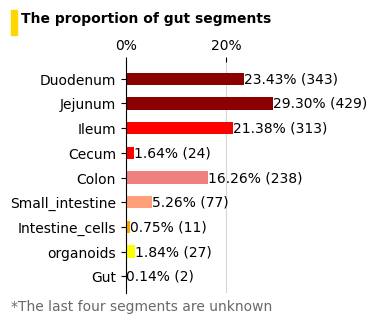

In [10]:
fig, ax = plt.subplots(figsize=(2, 3))
colors = ['navy', 'steelblue', 'steelblue', 'black', 'black', 'darkred',
          'darkred', 'darkred', 'darkred', 'red', 'red', 'lightcoral', 'lightsalmon',
          'orange', 'yellow', 'lightyellow']
subcolors=colors[-len(value_counts):]
bars=ax.barh(value_counts['value'], value_counts['proportion'],
        color=subcolors, # colors that we want
        zorder=2, # specify that the bars is drawn after the grid
        height=0.5
       )

ax.invert_yaxis()
# Add a vertical grey line at the relative position
ax.grid(linestyle='-', # type of lines
        alpha=0.5, # opacity
        axis='x', # specify that we only want vertical lines
       )

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Change axis position and labels
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels(['0%', '20%'])
ax.xaxis.tick_top()

# Title of our graph 
title = 'The proportion of gut segments'
fig.text(-0.4, 1.01, # relative postion
         title, 
         fontsize=10, # High font size for style
         fontweight = 'bold',
         ha='left', # align to the left
         family='dejavu sans'
        )

# Details and Credit
text = '*The last four segments are unknown'
fig.text(-0.45, 0.05, # relative postion
         text, 
         fontsize=10, # High font size for style
         color='dimgrey',
         ha='left', # align to the left
         family='dejavu sans'
        )

# Add yellow rectangle
rectangle_color = 'gold'
rect = patches.Rectangle((-0.45, 0.97), 0.03, 0.085,
                         linewidth=1, edgecolor=rectangle_color,
                         facecolor=rectangle_color, transform=fig.transFigure)
fig.patches.append(rect)

for bar in bars:
    width = bar.get_width()
    label = f'{width*100:.2f}% ({1464 * width:.0f})'
    ax.text(width, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black')
# plt.show()
plt.tight_layout()
plt.savefig('/disk222/yupf/RNA-seq/figures/prop_gut.pdf', bbox_inches='tight',dpi=300)

In [100]:
meta=pd.read_csv('/disk222/yupf/RNA-seq/filtered_meta2.csv')

In [105]:
meta['BioProject'].astype('category')

0        PRJEB58031
1        PRJEB58031
2        PRJEB58031
3        PRJEB58031
4        PRJEB58031
           ...     
3379    PRJNA377173
3380    PRJNA377173
3381    PRJNA377173
3382    PRJNA377173
3383    PRJNA377173
Name: BioProject, Length: 3384, dtype: category
Categories (104, object): ['PRJEB41970', 'PRJEB44896', 'PRJEB54752', 'PRJEB58031', ..., 'PRJNA985398', 'PRJNA991704', 'PRJNA998179', 'PRJNA998540']